<a href="https://colab.research.google.com/github/kimsihyun0129/ArtificialIntelligence/blob/main/%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98%EC%99%80_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.9 MB/s eta 0:00:00


## 최근접 이웃 분류(KNN)

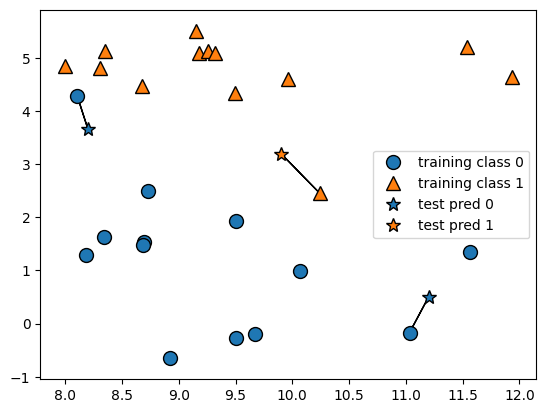

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

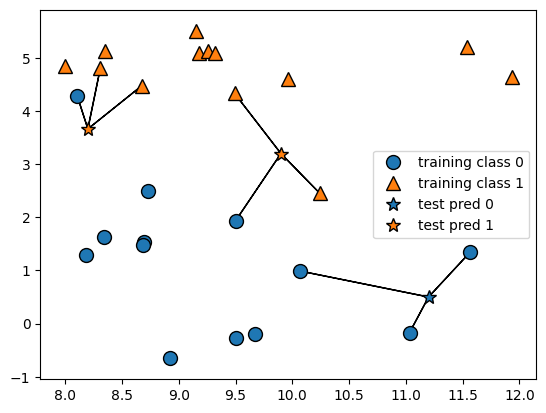

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", X_test.shape)

X_train.shape: (19, 2)
y_train.shape: (7, 2)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("테스트 세트 예측 :",clf.predict(X_test))
print("테스트 세트 정확도 :{:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도 :0.86


## KNeighborsClassifier 분석

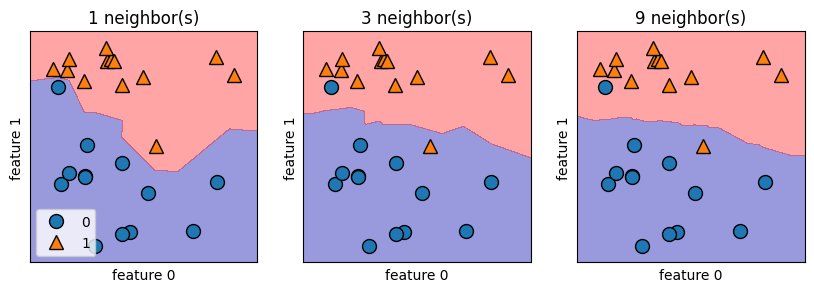

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

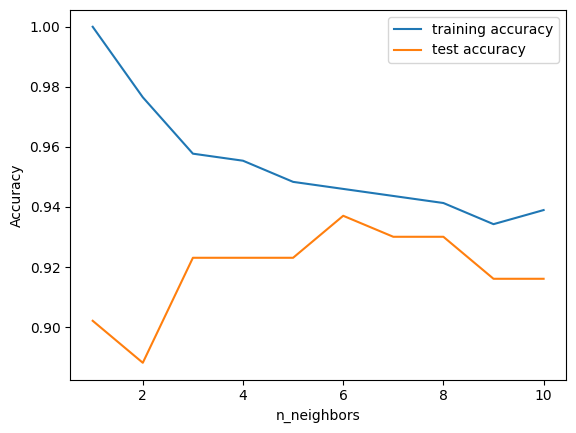

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 최근접 이웃 회귀

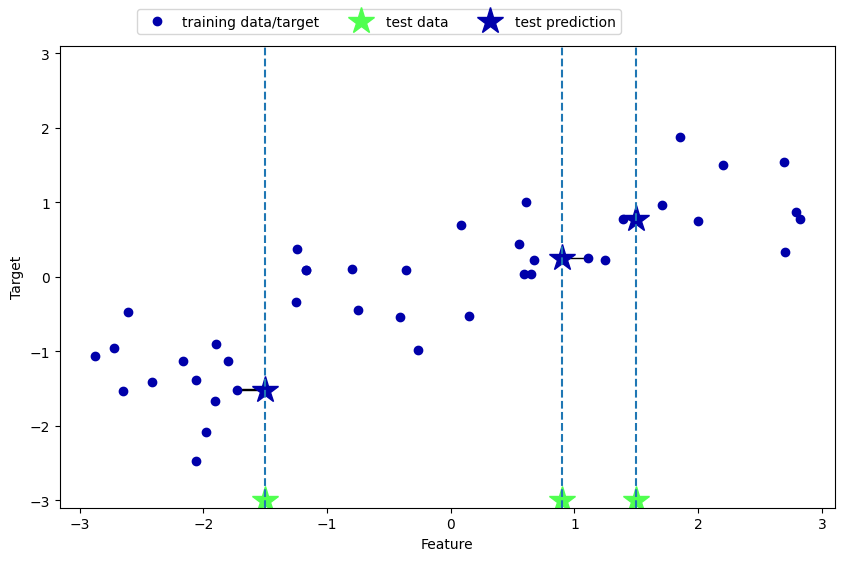

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

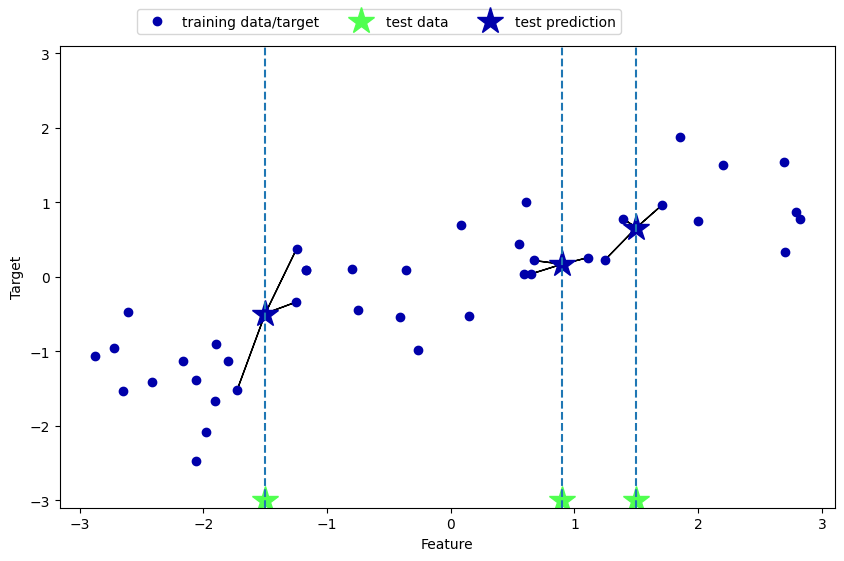

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 이웃의 수를 3으로 하여 모델의 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타겟을 사용하여 모델 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print("테스트 세트 예측 :\n", reg.predict(X_test))
print("테스트 세트 R^2f : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2f : 0.83


## KNeighborsRegressor 분석

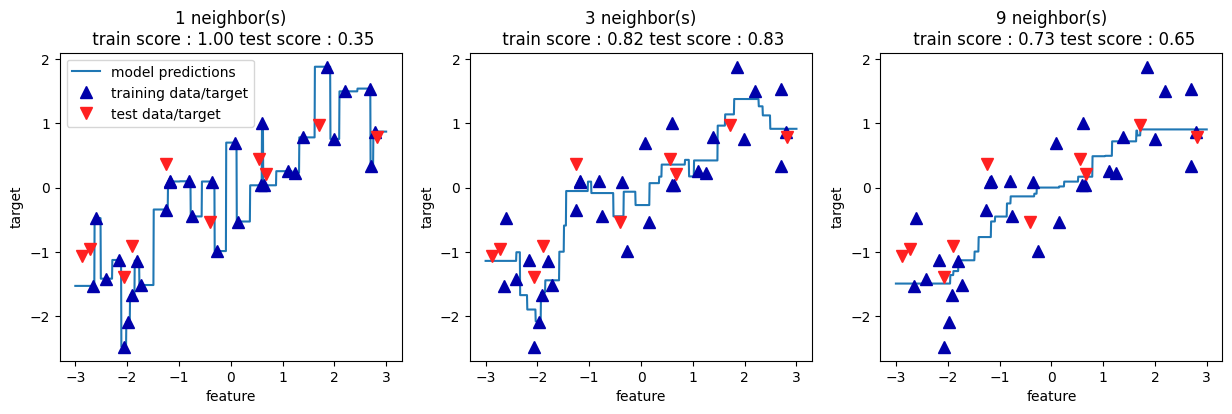

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title("{} neighbor(s)\n train score : {:.2f} test score : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("feature")
  ax.set_ylabel("target")

axes[0].legend(["model predictions", "training data/target", "test data/target"], loc="best")